In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

**Description Overview**

In this notebook, I am looking to unravel the correlations between certain features of netflix movies/shows in relation to their imdb score rating. There are three main features that I decide to study: cast, movie/show director, and release year. Firstly, I will see if the popularity of movie directors result in higher imdb scores than directors that are not as popular. This is computed by simply looking at the frequency of the directors in the dataset. Secondly, I will do the exact same thing, but for cast members. Lastly, I will see the difference in these scores between movies before 2012 and during or after 2012.

The results are pretty surprising


**Future Goals**

I am hoping to see if the variables I am studying have a direct affect on imdb scores. Later, I hope to use my analysis to see if I can make a model that uses such features to predict imdb score.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/main/dataset/clean/netflix_film_imdb_data.csv')
print(df.head())

                             title  \
0  Monty Python and the Holy Grail   
1                     My Fair Lady   
2                  The Blue Lagoon   
3                 Bonnie and Clyde   
4             The Guns of Navarone   

                                       description_x  release_year  runtime  \
0  King Arthur, accompanied by his squire, recrui...          1975       91   
1  A snobbish phonetics professor agrees to a wag...          1964      170   
2  Two small children and a ship's cook survive a...          1980      104   
3  In the 1930s, bored waitress Bonnie Parker fal...          1967      110   
4  A team of allied saboteurs are assigned an imp...          1961      158   

     imdb_id  imdb_score  imdb_votes show_id   type  \
0  tt0071853         8.2      530877   s4218  Movie   
1  tt0058385         7.8       94121   s1127  Movie   
2  tt0080453         5.8       69053    s176  Movie   
3  tt0061418         7.7      111189   s6359  Movie   
4  tt0054953         

**Query 1**

The code cell below will be the first query. Here, I am taking each director and counting how many times they direct a movie/show in the entire dataset. From there, I will avg the imdb scores of the the directors that appear exactly 1-5 times in the dataset. From there, we can see if director popularity affects average imdb scores.


I was originally expected it to be a very direct relationship where if the directory frequency increased, the mean imdb score would increase signficantly. However, we can see below that this is not true in all cases. Once the director has appeared more than 6 times, it seems that the imdb avg is higher. However, we must keep in mind that there is only a small amount of directors that have so many movies. Thus, the results may be only representative of a small number of directors.


Very surprising!

Average IMDb score for directors with 1-13 movies: 6.22
Number of rows returned: 11
Query execution time: 0.002306 seconds


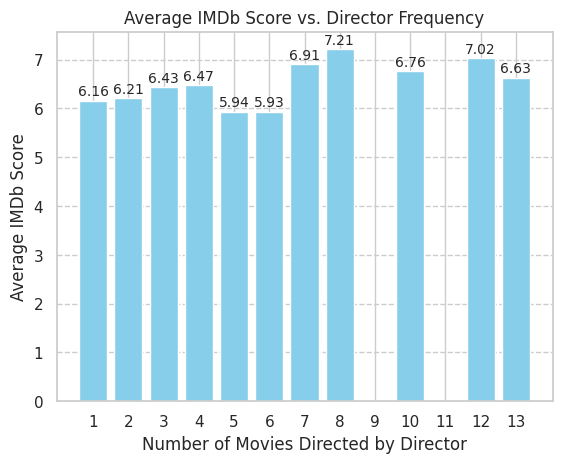

In [41]:

# These are some of the columns that I will use
columns_of_interest = ['director', 'cast_freq_mean', 'release_year', 'genre_freq_mean', 'imdb_score']
data = df[columns_of_interest].dropna()
# For each director, let's count how many times they appear in the dataset
director_counts = data['director'].value_counts().reset_index()
#print(director_counts)
director_counts.columns = ['director', 'movie_count']
# Take these movie counts a put them back into the main dataframe
data_merged = data.merge(director_counts, on='director')
import time
start_time = time.time()
# This will be Query 1. I want to take the directors that appear once, twice, thrice,.. and visualize how the imdb scores change depending on how often they appear
filtered_data = data_merged[data_merged['movie_count'].between(1, 13)]
avg_scores = filtered_data.groupby('movie_count')['imdb_score'].mean().reset_index()
elapsed_time = time.time() - start_time
overall_avg = filtered_data['imdb_score'].mean()
print(f"Average IMDb score for directors with 1-13 movies: {overall_avg:.2f}")
print(f"Number of rows returned: {len(avg_scores)}")
print(f"Query execution time: {elapsed_time:.6f} seconds")
plt.bar(avg_scores['movie_count'], avg_scores['imdb_score'], color='skyblue')
plt.xlabel('Number of Movies Directed by Director')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score vs. Director Frequency')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.grid(axis='y', linestyle='--')
for i, row in avg_scores.iterrows():
    plt.text(row['movie_count'], row['imdb_score'] + 0.1, f"{row['imdb_score']:.2f}", ha='center', fontsize=10)

plt.show()


In [11]:
print((data['director'] == 'Unknown').sum())


596


Now, let's look at the average imdb scores for movies/shows where the director is not known

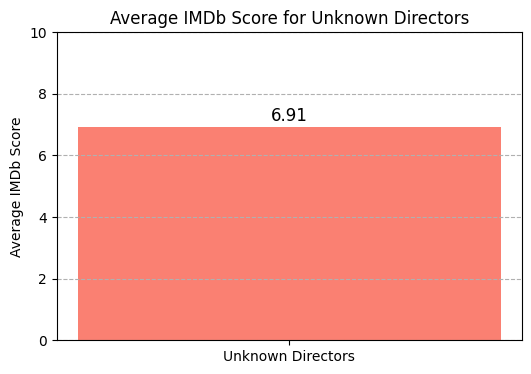

In [12]:
# Filter for movies with unknown directors
unknown_directors_data = data[data['director'] == 'Unknown']

# Calculate average IMDb score for unknown directors
avg_unknown_imdb_score = unknown_directors_data['imdb_score'].mean()
plt.figure(figsize=(6,4))
plt.bar('Unknown Directors', avg_unknown_imdb_score, color='salmon')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score for Unknown Directors')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--')

plt.text(0, avg_unknown_imdb_score + 0.2, f"{avg_unknown_imdb_score:.2f}", ha='center', fontsize=12)

plt.show()

**Wow. Even when the director is unknown, the imdb score average is really high!. It seems that imdb score average only begins to increase significantly when the director is extremely experienced (> 6 movies/shows)**


Let's look at it and see if the year the movie was made makes a difference

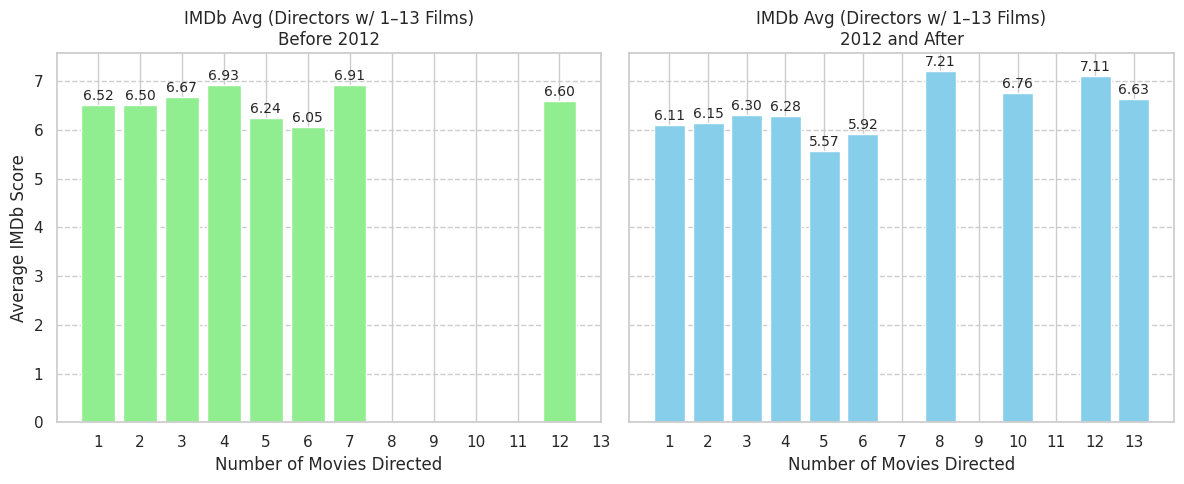

In [38]:
# Split by release year
filtered_before_2012 = filtered_data[filtered_data['release_year'] < 2012]
filtered_after_or_2012 = filtered_data[filtered_data['release_year'] >= 2012]
# Compute average IMDb scores grouped by movie count
avg_before_2012 = filtered_before_2012.groupby('movie_count')['imdb_score'].mean().reset_index()
avg_after_2012 = filtered_after_or_2012.groupby('movie_count')['imdb_score'].mean().reset_index()
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histogram for release_year < 2012
axs[0].bar(avg_before_2012['movie_count'], avg_before_2012['imdb_score'], color='lightgreen')
axs[0].set_title('IMDb Avg (Directors w/ 1–13 Films)\nBefore 2012')
axs[0].set_xlabel('Number of Movies Directed')
axs[0].set_ylabel('Average IMDb Score')
axs[0].set_xticks([1, 2, 3, 4, 5,6,7,8,9,10,11,12,13])
axs[0].grid(axis='y', linestyle='--')
for _, row in avg_before_2012.iterrows():
    axs[0].text(row['movie_count'], row['imdb_score'] + 0.1, f"{row['imdb_score']:.2f}", ha='center', fontsize=10)

# Histogram for release_year >= 2012
axs[1].bar(avg_after_2012['movie_count'], avg_after_2012['imdb_score'], color='skyblue')
axs[1].set_title('IMDb Avg (Directors w/ 1–13 Films)\n2012 and After')
axs[1].set_xlabel('Number of Movies Directed')
axs[1].set_xticks([1, 2, 3, 4, 5,6,7,8,9,10,11,12,13])
axs[1].grid(axis='y', linestyle='--')
for _, row in avg_after_2012.iterrows():
    axs[1].text(row['movie_count'], row['imdb_score'] + 0.1, f"{row['imdb_score']:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**Thoughts on the Results**

I think that by looking at this data, we can see that when the directors are less experienced, the movies/shows before 2012 got higher average ratings. I don't think looking at entries with directors that are more experienced can really be compared here because there isn't as many experienced directors before 2012 than there are after. We can assume that the movie industry was not as popular before 2012.

**Let's do the same thing that we have done already but for the Cast**

The code cell below will contain a second query, which will be the same as the first but for cast members!

2417
42
13
2
Number of rows returned: 4
Query execution time: 0.002690 seconds
Overall average IMDb score for cast appearing 1-4 times: 6.38


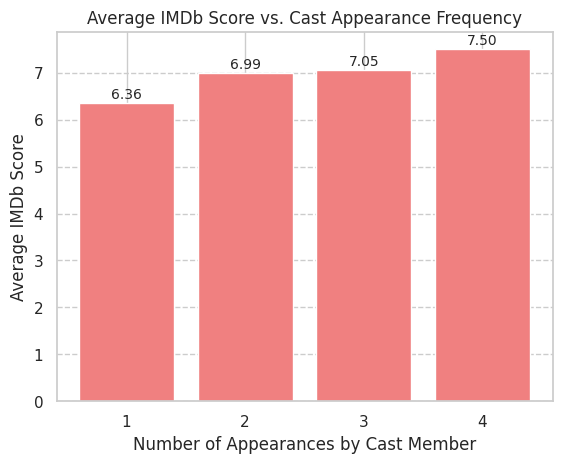

In [42]:
# Expand the cast lists to individual rows
cast_expanded = df.explode('cast')[['cast', 'cast_freq_mean', 'release_year', 'genre_freq_mean', 'imdb_score']].dropna()

# Count occurrences of each cast member
cast_counts = cast_expanded['cast'].value_counts().reset_index()
cast_counts.columns = ['cast', 'appearance_count']
print((cast_counts['appearance_count'] > 0).sum())
print((cast_counts['appearance_count'] > 1).sum())
print((cast_counts['appearance_count'] > 2).sum())
print((cast_counts['appearance_count'] > 3).sum())
cast_merged = cast_expanded.merge(cast_counts, on='cast')
# Filter cast members appearing exactly 1 to 4 times and compute average IMDb score
start_time = time.time()
# I chose 1-4 because if we see below, there really isn't that many cast members that appear more than once.
filtered_cast_data = cast_merged[cast_merged['appearance_count'].between(1, 4)]
avg_cast_scores = filtered_cast_data.groupby('appearance_count')['imdb_score'].mean().reset_index()
elapsed_time = time.time() - start_time
print(f"Number of rows returned: {len(avg_cast_scores)}")
print(f"Query execution time: {elapsed_time:.6f} seconds")
# Overall average IMDb score for cast members appearing 1-4 times
overall_cast_avg = filtered_cast_data['imdb_score'].mean()
print(f"Overall average IMDb score for cast appearing 1-4 times: {overall_cast_avg:.2f}")
plt.bar(avg_cast_scores['appearance_count'], avg_cast_scores['imdb_score'], color='lightcoral')
plt.xlabel('Number of Appearances by Cast Member')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score vs. Cast Appearance Frequency')
plt.xticks([1, 2, 3, 4])
plt.grid(axis='y', linestyle='--')
for _, row in avg_cast_scores.iterrows():
    plt.text(row['appearance_count'], row['imdb_score'] + 0.1, f"{row['imdb_score']:.2f}", ha='center', fontsize=10)

plt.show()

**Thoughts on Results**

Ok. This one looks a little better. The movies that have more experienced cast member seem to have better ratings, but it's not really extremely significant in my opinion. Also, there is huge difference in sample size for the number of appearances of the cast members, so we have to keep in mind that these results may be overfitting to specific actors.

**We will study the same thing for release years as we did for the directors**

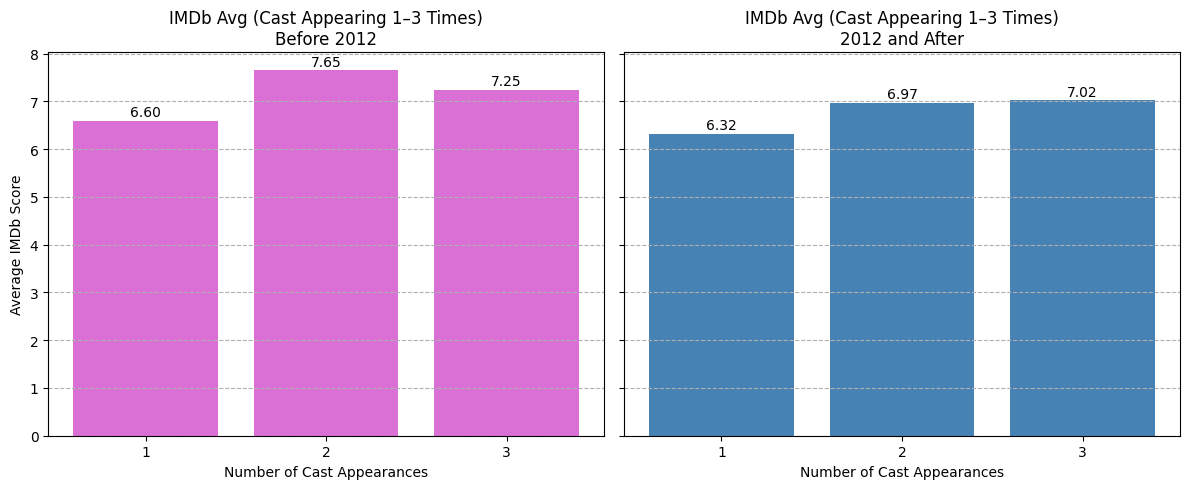

In [29]:
# Split the cast data by release year
cast_before_2012 = filtered_cast_data[filtered_cast_data['release_year'] < 2012]
cast_after_or_2012 = filtered_cast_data[filtered_cast_data['release_year'] >= 2012]
avg_cast_before_2012 = cast_before_2012.groupby('appearance_count')['imdb_score'].mean().reset_index()
avg_cast_after_2012 = cast_after_or_2012.groupby('appearance_count')['imdb_score'].mean().reset_index()
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histogram for cast appearance frequency before 2012
axs[0].bar(avg_cast_before_2012['appearance_count'], avg_cast_before_2012['imdb_score'], color='orchid')
axs[0].set_title('IMDb Avg (Cast Appearing 1–3 Times)\nBefore 2012')
axs[0].set_xlabel('Number of Cast Appearances')
axs[0].set_ylabel('Average IMDb Score')
axs[0].set_xticks([1, 2, 3])
axs[0].grid(axis='y', linestyle='--')
for _, row in avg_cast_before_2012.iterrows():
    axs[0].text(row['appearance_count'], row['imdb_score'] + 0.1, f"{row['imdb_score']:.2f}", ha='center', fontsize=10)

avg_cast_after_2012 = avg_cast_after_2012[avg_cast_after_2012['appearance_count'].between(1, 3)]
# Histogram for cast appearance frequency 2012 and after
axs[1].bar(avg_cast_after_2012['appearance_count'], avg_cast_after_2012['imdb_score'], color='steelblue')
axs[1].set_title('IMDb Avg (Cast Appearing 1–3 Times)\n2012 and After')
axs[1].set_xlabel('Number of Cast Appearances')
axs[1].set_xticks([1, 2, 3])
axs[1].grid(axis='y', linestyle='--')
for _, row in avg_cast_after_2012.iterrows():
    axs[1].text(row['appearance_count'], row['imdb_score'] + 0.1, f"{row['imdb_score']:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


The last thing I want to study is Cast Frequency Mean and Genre Frequency Mean. I will create a scatterplot so we can see how the means relate to imdb scores

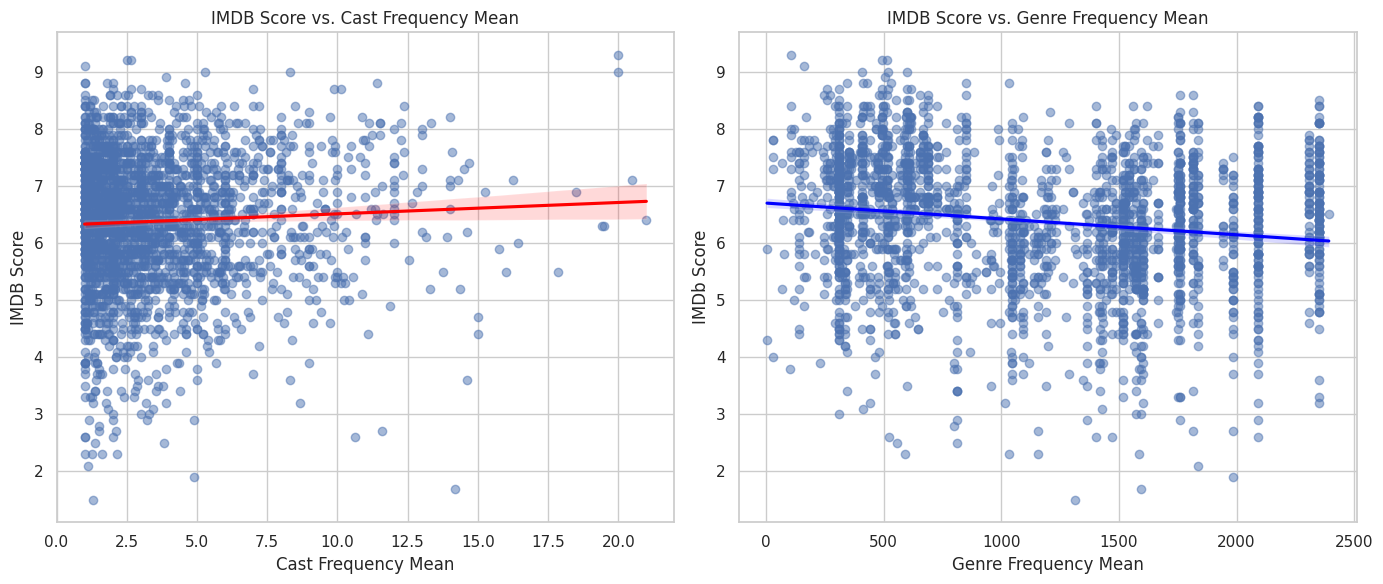


Correlation Analysis:
Correlation between Cast Frequency Mean and IMDb Score: 0.050
Correlation between Genre Frequency Mean and IMDb Score: -0.163


In [40]:
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
plt.subplot(1, 2, 1)
sns.regplot(x='cast_freq_mean', y='imdb_score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('IMDB Score vs. Cast Frequency Mean')
plt.xlabel('Cast Frequency Mean')
plt.ylabel('IMDB Score')
plt.subplot(1, 2, 2)
sns.regplot(x='genre_freq_mean', y='imdb_score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('IMDB Score vs. Genre Frequency Mean')
plt.xlabel('Genre Frequency Mean')
plt.ylabel('IMDb Score')

plt.tight_layout()
plt.show()

cast_corr = df['cast_freq_mean'].corr(df['imdb_score'])
genre_corr = df['genre_freq_mean'].corr(df['imdb_score'])

print("\nCorrelation Analysis:")
print(f"Correlation between Cast Frequency Mean and IMDb Score: {cast_corr:.3f}")
print(f"Correlation between Genre Frequency Mean and IMDb Score: {genre_corr:.3f}")

Wow. These results show that there is little to no correlation between imdb scores and cast frequency mean.